# Support Vector Machines
### In this exercise, you will be using support vector machines (SVMs) to build a spam classifier.

(Programming assignments that I implemented in python of Machine Learning Course (it uses Octave/MATLAB)

In [85]:
import scipy.io
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
data = scipy.io.loadmat('ex6data1.mat')
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

# Example Dataset 1
We will begin by with a 2D example dataset which can be separated by a linear boundary.

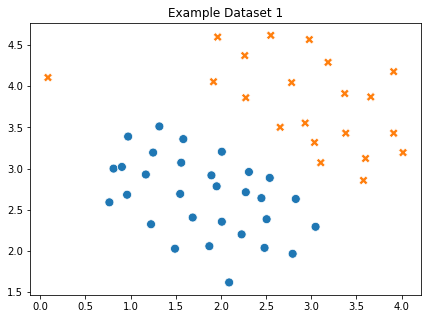

In [87]:
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x=data['X'][:,0], y=data['X'][:,1], hue=data['y'].ravel(), style=data['y'].ravel(), s=80, legend=False)
plt.title('Example Dataset 1')
plt.show(ax)

### Decision Boundary


In [88]:
def plot_boundary(X, y, model, title):
    ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, s=80, legend=False)
    ax.set(title=title)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    Z = model.decision_function(xy).reshape(XX.shape)
    a = ax.contour(XX, YY, Z, colors='g', levels=[0], linestyles=['--'])

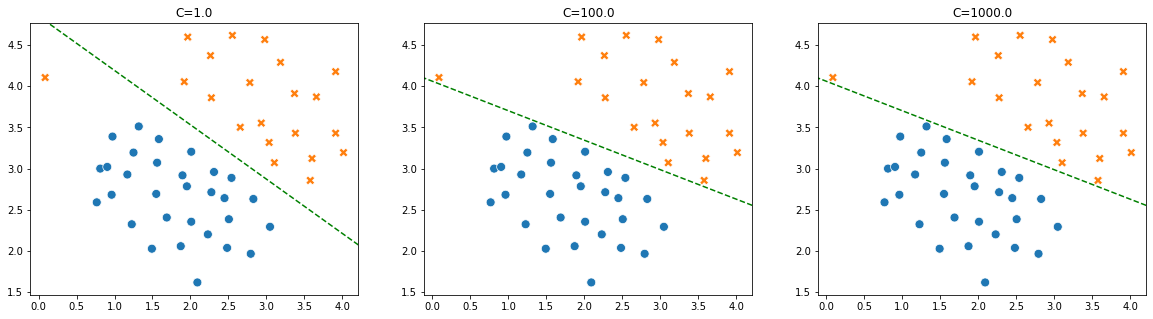

In [89]:
from sklearn import svm

c_vals = [1.0, 100.0, 1000.0]
plt.figure(figsize=(20,5))

for i, c in enumerate(c_vals):
    clf = svm.SVC(kernel='linear', C=c)
    clf.fit(data['X'], data['y'].ravel())
    
    plt.subplot(1,3,i+1)
    plot_boundary(data['X'], data['y'].ravel(), clf, 'C={}'.format(c))
    
plt.show()

# SVM with Gaussian Kernels
Gaussian kernel:

In [90]:
def gaussian_kernel(x1, x2, sigma=0.1):
    x1 = x1.ravel()
    x2 = x2.ravel()
    sum_x1_x2 = np.sum((x1-x2)**2)
    return np.exp(-sum_x1_x2/(2*sigma**2))

In [91]:
x1 = np.array([1,2,1])
x2 = np.array([0,4,-1])
sigma = 2
gk = gaussian_kernel(x1, x2, sigma)
print('Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = {0} : {1}\n\t(for sigma = 2, this value should be about 0.324652)\n'.format(sigma, gk))

Gaussian Kernel between x1 = [1; 2; 1], x2 = [0; 4; -1], sigma = 2 : 0.32465246735834974
	(for sigma = 2, this value should be about 0.324652)



# Example Dataset 2

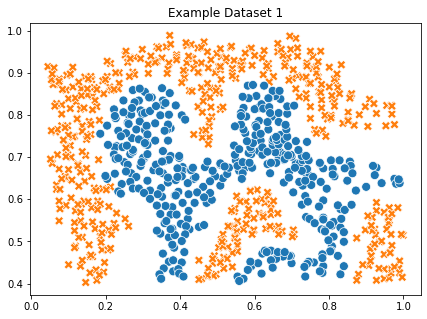

In [92]:
data2 = scipy.io.loadmat('ex6data2.mat')
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x=data2['X'][:,0], y=data2['X'][:,1], hue=data2['y'].ravel(), style=data2['y'].ravel(), s=80, legend=False)
plt.title('Example Dataset 1')
plt.show(ax)

In [93]:
def gaussian_kernel_matrix(X1, X2, sigma=0.1):
    gram_matrix = np.zeros((X1.shape[0], X2.shape[0]))
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            gram_matrix[i, j] = gaussian_kernel(x1, x2, sigma)
    return gram_matrix

In [94]:
def plot_gaussian_boundary(X, y, model, title='SVM Decision Boundary for Gaussian Kernel'):
    plt.figure(figsize=(7,5))
    ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, s=80, legend=False)
    ax.set(title=title)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T

    gram = gaussian_kernel_matrix(xy, X)
    Z = model.predict(gram).reshape(XX.shape)

    a = ax.contour(XX, YY, Z, colors='g', levels=[0.5], linestyles=['--'])
    plt.show()

In [95]:
clf = svm.SVC(kernel="precomputed", C=1.0, verbose=True)
gram = gaussian_kernel_matrix(data2['X'], data2['X'], sigma=0.1)
clf.fit(gram, data2['y'].ravel())

[LibSVM]

SVC(kernel='precomputed', verbose=True)

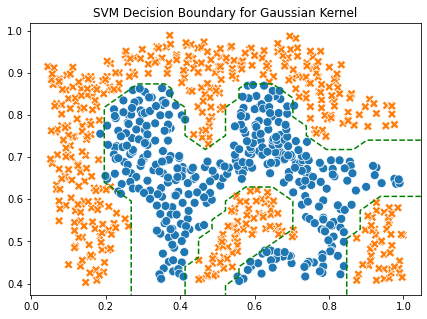

In [96]:

plot_gaussian_boundary(data2['X'], data2['y'].ravel(), clf)

# Example Dataset 3

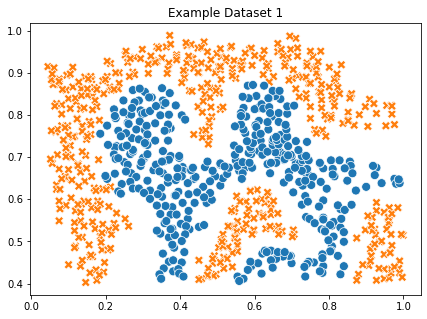

In [97]:
data3 = scipy.io.loadmat('ex6data3.mat')
plt.figure(figsize=(7,5))
ax = sns.scatterplot(x=data2['X'][:,0], y=data2['X'][:,1], hue=data2['y'].ravel(), style=data2['y'].ravel(), s=80, legend=False)
plt.title('Example Dataset 1')
plt.show(ax)

# Best parameters C and sigma

In [98]:
def find_best_c_sigma(X, y, Xval, yval):
    C_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    sigma_vals = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30]
    error = 9999

    C = 0.01
    sigma = 0.01
    for c in C_vals:
        for s in sigma_vals:
            clf = svm.SVC(kernel="precomputed", C=c)
            gram = gaussian_kernel_matrix(X, X, sigma=s)
            clf.fit(gram, y)
            
            gram_pred = gaussian_kernel_matrix(Xval, X)
            y_pred = clf.predict(gram_pred)

            error_mean = np.mean(y_pred != yval)
            if error_mean < error:
                C = c
                sigma = s
                error = error_mean
    return C, sigma


In [99]:
C, sigma = find_best_c_sigma(data3['X'], data3['y'].ravel(), data3['Xval'], data3['yval'].ravel())

In [100]:
clf = svm.SVC(kernel="precomputed", C=c)
gram = gaussian_kernel_matrix(data3['X'], data3['X'], sigma=sigma)
clf.fit(gram, data3['y'].ravel())

SVC(C=1000.0, kernel='precomputed')

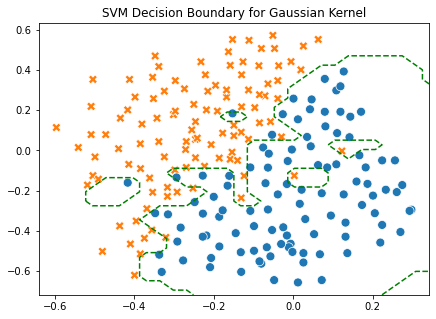

In [101]:
plot_gaussian_boundary(data3['X'], data3['y'].ravel(), clf)

# Spam Classification
Many email services today provide spam filters that are able to classify emails into spam and non-spam email with high accuracy. In this part of the exercise, you will use SVMs to build your own spam filter. You will be training a classifier to classify whether a given email, x, is spam (y = 1) or non-spam (y = 0).

### Preprocessing Emails

In [104]:
spam_1 = open('spamSample1.txt', 'r')
contents = spam_1.read()
print(contents)

Do You Want To Make $1000 Or More Per Week?

 

If you are a motivated and qualified individual - I 
will personally demonstrate to you a system that will 
make you $1,000 per week or more! This is NOT mlm.

 

Call our 24 hour pre-recorded number to get the 
details.  

 

000-456-789

 

I need people who want to make serious money.  Make 
the call and get the facts. 

Invest 2 minutes in yourself now!

 

000-456-789

 

Looking forward to your call and I will introduce you 
to people like yourself who
are currently making $10,000 plus per week!

 

000-456-789



3484lJGv6-241lEaN9080lRmS6-271WxHo7524qiyT5-438rjUv5615hQcf0-662eiDB9057dMtVl72


### Preprocessing steps:
- Lower case
- Strip all HTML: Looks for any expression that starts with < and ends with > and replace with a space
- Handle numbers: Replace numbers with the text 'number'
- Handle URLS: Replace URLs with the text 'httpaddr'
- Handle Email Addresses: Replace email addresses with the text 'emailaddr'
- Handle Dollars $: Replace $ with the text 'dollar'
- Remove non-words: Remove non alphanumeric characters and punctuation
- Word stemming

In [105]:
import re
import string
from nltk.stem import PorterStemmer

In [106]:
def process_email(email_contents):
    processed = email_contents.lower()
    processed = re.sub('<[^<>]+>', ' ', processed)
    processed = re.sub('[0-9]+', 'number', processed)
    processed = re.sub('(http|https)://[^\s]*', 'httpaddr', processed)
    processed = re.sub('[^\s]+@[^\s]+', 'emailaddr', processed)
    processed = re.sub('[$]+', 'dollar', processed)

    for punctuation in string.punctuation:
        processed = processed.replace(punctuation, ' ')
    
    stemmer = PorterStemmer()
    processed = ' '.join([stemmer.stem(re.sub('[^a-zA-Z0-9]', '', word)) for word in processed.split()])
    processed = ' '.join(processed.split())    
    return processed.strip()

In [108]:
process_email(contents)

'do you want to make dollarnumb or more per week if you are a motiv and qualifi individu i will person demonstr to you a system that will make you dollarnumb number per week or more thi is not mlm call our number hour pre record number to get the detail number number number i need peopl who want to make seriou money make the call and get the fact invest number minut in yourself now number number number look forward to your call and i will introduc you to peopl like yourself who are current make dollarnumb number plu per week number number number numberljgvnumb numberleannumberlrmsnumb numberwxhonumberqiytnumb numberrjuvnumberhqcfnumb numbereidbnumberdmtvlnumb'

### Vocabulary List

In [111]:
df_vocab = pd.read_csv('vocab.txt', sep='\t', header=None)
df_vocab.columns = ['index', 'word']
df_vocab.sample(10)

,index,word
1859,1860,with
1081,1082,music
1234,1235,perfectli
1483,1484,sep
639,640,fill
721,722,gold
1386,1387,regul
386,387,current
1821,1822,web
1242,1243,pgp


In [113]:
def process_email_and_get_indices(text):
    text = process_email(text)
    print('\n======= Processed Email =======\n', text, '\n========\n')
    df_vocab = pd.read_csv('vocab.txt', sep='\t', header=None)
    df_vocab.columns = ['index', 'word']
    indices = [df_vocab[df_vocab.word==word]['index'].values[0] 
              for word in text.split() if len(df_vocab[df_vocab.word==word]['index'].values > 0)]
    
    return indices

In [116]:
word_indices = process_email_and_get_indices(contents)
print(word_indices)


======= Processed Email =======
 do you want to make dollarnumb or more per week if you are a motiv and qualifi individu i will person demonstr to you a system that will make you dollarnumb number per week or more thi is not mlm call our number hour pre record number to get the detail number number number i need peopl who want to make seriou money make the call and get the fact invest number minut in yourself now number number number look forward to your call and i will introduc you to peopl like yourself who are current make dollarnumb number plu per week number number number numberljgvnumb numberleannumberlrmsnumb numberwxhonumberqiytnumb numberrjuvnumberhqcfnumb numbereidbnumberdmtvlnumb 

[471, 1893, 1809, 1699, 997, 479, 1182, 1064, 1231, 1827, 810, 1893, 1070, 74, 1346, 837, 1852, 1242, 1699, 1893, 1631, 1665, 1852, 997, 1893, 479, 1120, 1231, 1827, 1182, 1064, 1676, 877, 1113, 234, 1191, 1120, 792, 1287, 1377, 1120, 1699, 708, 1666, 440, 1120, 1120, 1120, 1093, 1230, 1844, 1809

### Extracting Features from Emails

In [117]:
def email_features(indices):
    n = 1899
    x = np.zeros((n,1))
    x[indices] = 1
    return x

In [118]:
features = email_features(word_indices)

In [119]:
print('Length of feature vector:', len(features))
print('Number of non-zero entries:', sum(features==1)[0])

Length of feature vector: 1899
Number of non-zero entries: 48


### Training SVM for Spam Classification

In [121]:
data_train = scipy.io.loadmat('spamTrain.mat')
data_test = scipy.io.loadmat('spamTest.mat')

In [122]:
clf = svm.SVC(kernel='linear', C=0.1)
clf.fit(data_train['X'], data_train['y'].ravel())

SVC(C=0.1, kernel='linear')

In [123]:
print('Training Accuracy:', clf.score(data_train['X'], data_train['y'].ravel()))

Training Accuracy: 0.99825


In [126]:
print('Training Accuracy:', clf.score(data_test['Xtest'], data_test['ytest'].ravel()))

Training Accuracy: 0.989


### Top Predictors for Spam

In [128]:
df_vocab['weights'] = clf.coef_[0,:]
#df_vocab.sort_values(by='weights', ascending=False).head(15)

In [129]:
df_vocab.sort_values(by='weights', ascending=False).head()

,index,word,weights
1190,1191,our,0.500614
297,298,click,0.465916
1397,1398,remov,0.422869
738,739,guarante,0.383622
1795,1796,visit,0.367710


### Predicting on new email

In [142]:
spam_1 = open('spamSample1.txt', 'r')
contents = spam_1.read()
word_indices = process_email_and_get_indices(contents)
x = email_features(word_indices)
y_pred = clf.predict(x.reshape(1,-1))
print('Spam Classification:', y_pred[0])


======= Processed Email =======
 do you want to make dollarnumb or more per week if you are a motiv and qualifi individu i will person demonstr to you a system that will make you dollarnumb number per week or more thi is not mlm call our number hour pre record number to get the detail number number number i need peopl who want to make seriou money make the call and get the fact invest number minut in yourself now number number number look forward to your call and i will introduc you to peopl like yourself who are current make dollarnumb number plu per week number number number numberljgvnumb numberleannumberlrmsnumb numberwxhonumberqiytnumb numberrjuvnumberhqcfnumb numbereidbnumberdmtvlnumb 

Spam Classification: 0


In [143]:
spam_2 = open('spamSample2.txt')
contents = spam_2.read()
word_indices = process_email_and_get_indices(contents)
x = email_features(word_indices)
y_pred = clf.predict(x.reshape(1, -1))
print('Spam Classification:', y_pred[0])


======= Processed Email =======
 best buy viagra gener onlin viagra numbermg x number pill dollarnumb free pill reorder discount top sell number qualiti satisfact guarante we accept visa master e check payment number satisfi custom httpaddr 

Spam Classification: 1


In [144]:
spam_1 = open('emailSample1.txt', 'r')
contents = spam_1.read()
word_indices = process_email_and_get_indices(contents)
x = email_features(word_indices)
y_pred = clf.predict(x.reshape(1,-1))
print('Spam Classification:', y_pred[0])


======= Processed Email =======
 anyon know how much it cost to host a web portal well it depend on how mani visitor you re expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr 

Spam Classification: 0


In [145]:
spam_2 = open('emailSample2.txt')
contents = spam_2.read()
word_indices = process_email_and_get_indices(contents)
x = email_features(word_indices)
y_pred = clf.predict(x.reshape(1, -1))
print('Spam Classification:', y_pred[0])


======= Processed Email =======
 folk my first time post have a bit of unix experi but am new to linux just got a new pc at home dell box with window xp ad a second hard disk for linux partit the disk and have instal suse number number from cd which went fine except it didn t pick up my monitor i have a dell brand enumberfpp number lcd flat panel monitor and a nvidia geforcenumb tinumb video card both of which are probabl too new to featur in suse s default set i download a driver from the nvidia websit and instal it use rpm then i ran saxnumb as wa recommend in some post i found on the net but it still doesn t featur my video card in the avail list what next anoth problem i have a dell brand keyboard and if i hit cap lock twice the whole machin crash in linux not window even the on off switch is inact leav me to reach for the power cabl instead if anyon can help me in ani way with these prob i d be realli grate i ve search the net but have run out of idea or should i be go for a diff